In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':15})

# Least Squares Fitting

## Overview:


**Questions**
- How do you fit a model to data?
- What is least squares fitting?

**Objectives**
- Use least-squares to fit a line to some data
- Confirm your results using `curve_fit`

## How do you fit a model to data?

What do we mean by "fitting a model to data"? A model is just something that describes your observations. It can be as simple as a straight line fit with just 1 or two unknowns, or as complicated as a cosmological model with many unknown parameters.

When we're fitting a model to data we're using some kind of theory or prediction about how different observed variables are related. A common example is fitting a straight line, $y=mx + x$, to some data to try to find a linear relationshp.


But what's actually happening when we do this? How are we determining $m$ and $c$?


## Fitting a straight line

We're going to look at the BoltData again to show how the process works. Find your file and read in the data into a dataframe:


In [2]:
bolt_df = pd.read_csv('../data/BoltData.csv', names=('distance', 'err_distance', 'time', 'err_time'), header=0)

As always, have a quick look at the dataframe to make sure it's read in as expected. **Don't skip this step!** It will save you a lot of time in the long run to get in the habit of checking that it looks OK right at the start. 

In [3]:
bolt_df

,distance,err_distance,time,err_time
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


Previously we've used `curve_fit` to fit a best-fit line to our data. Here we're going to look at what `curve_fit` is actually doing.

When we worked with this data before we defined a function such as
```py
def best_fit(x, m, c):
    return m*x + c
```
corrseponding to 
$$ f(x) = m x + c $$

and used `curve_fit` to find the best values of $m$ and $c$ (the slope and intercept). But what is curve fit actually doing? What do we mean by the "best" values?

`curve_fit` uses the **least squares** method to find the best values. 

The figure below illustrates what's happening:

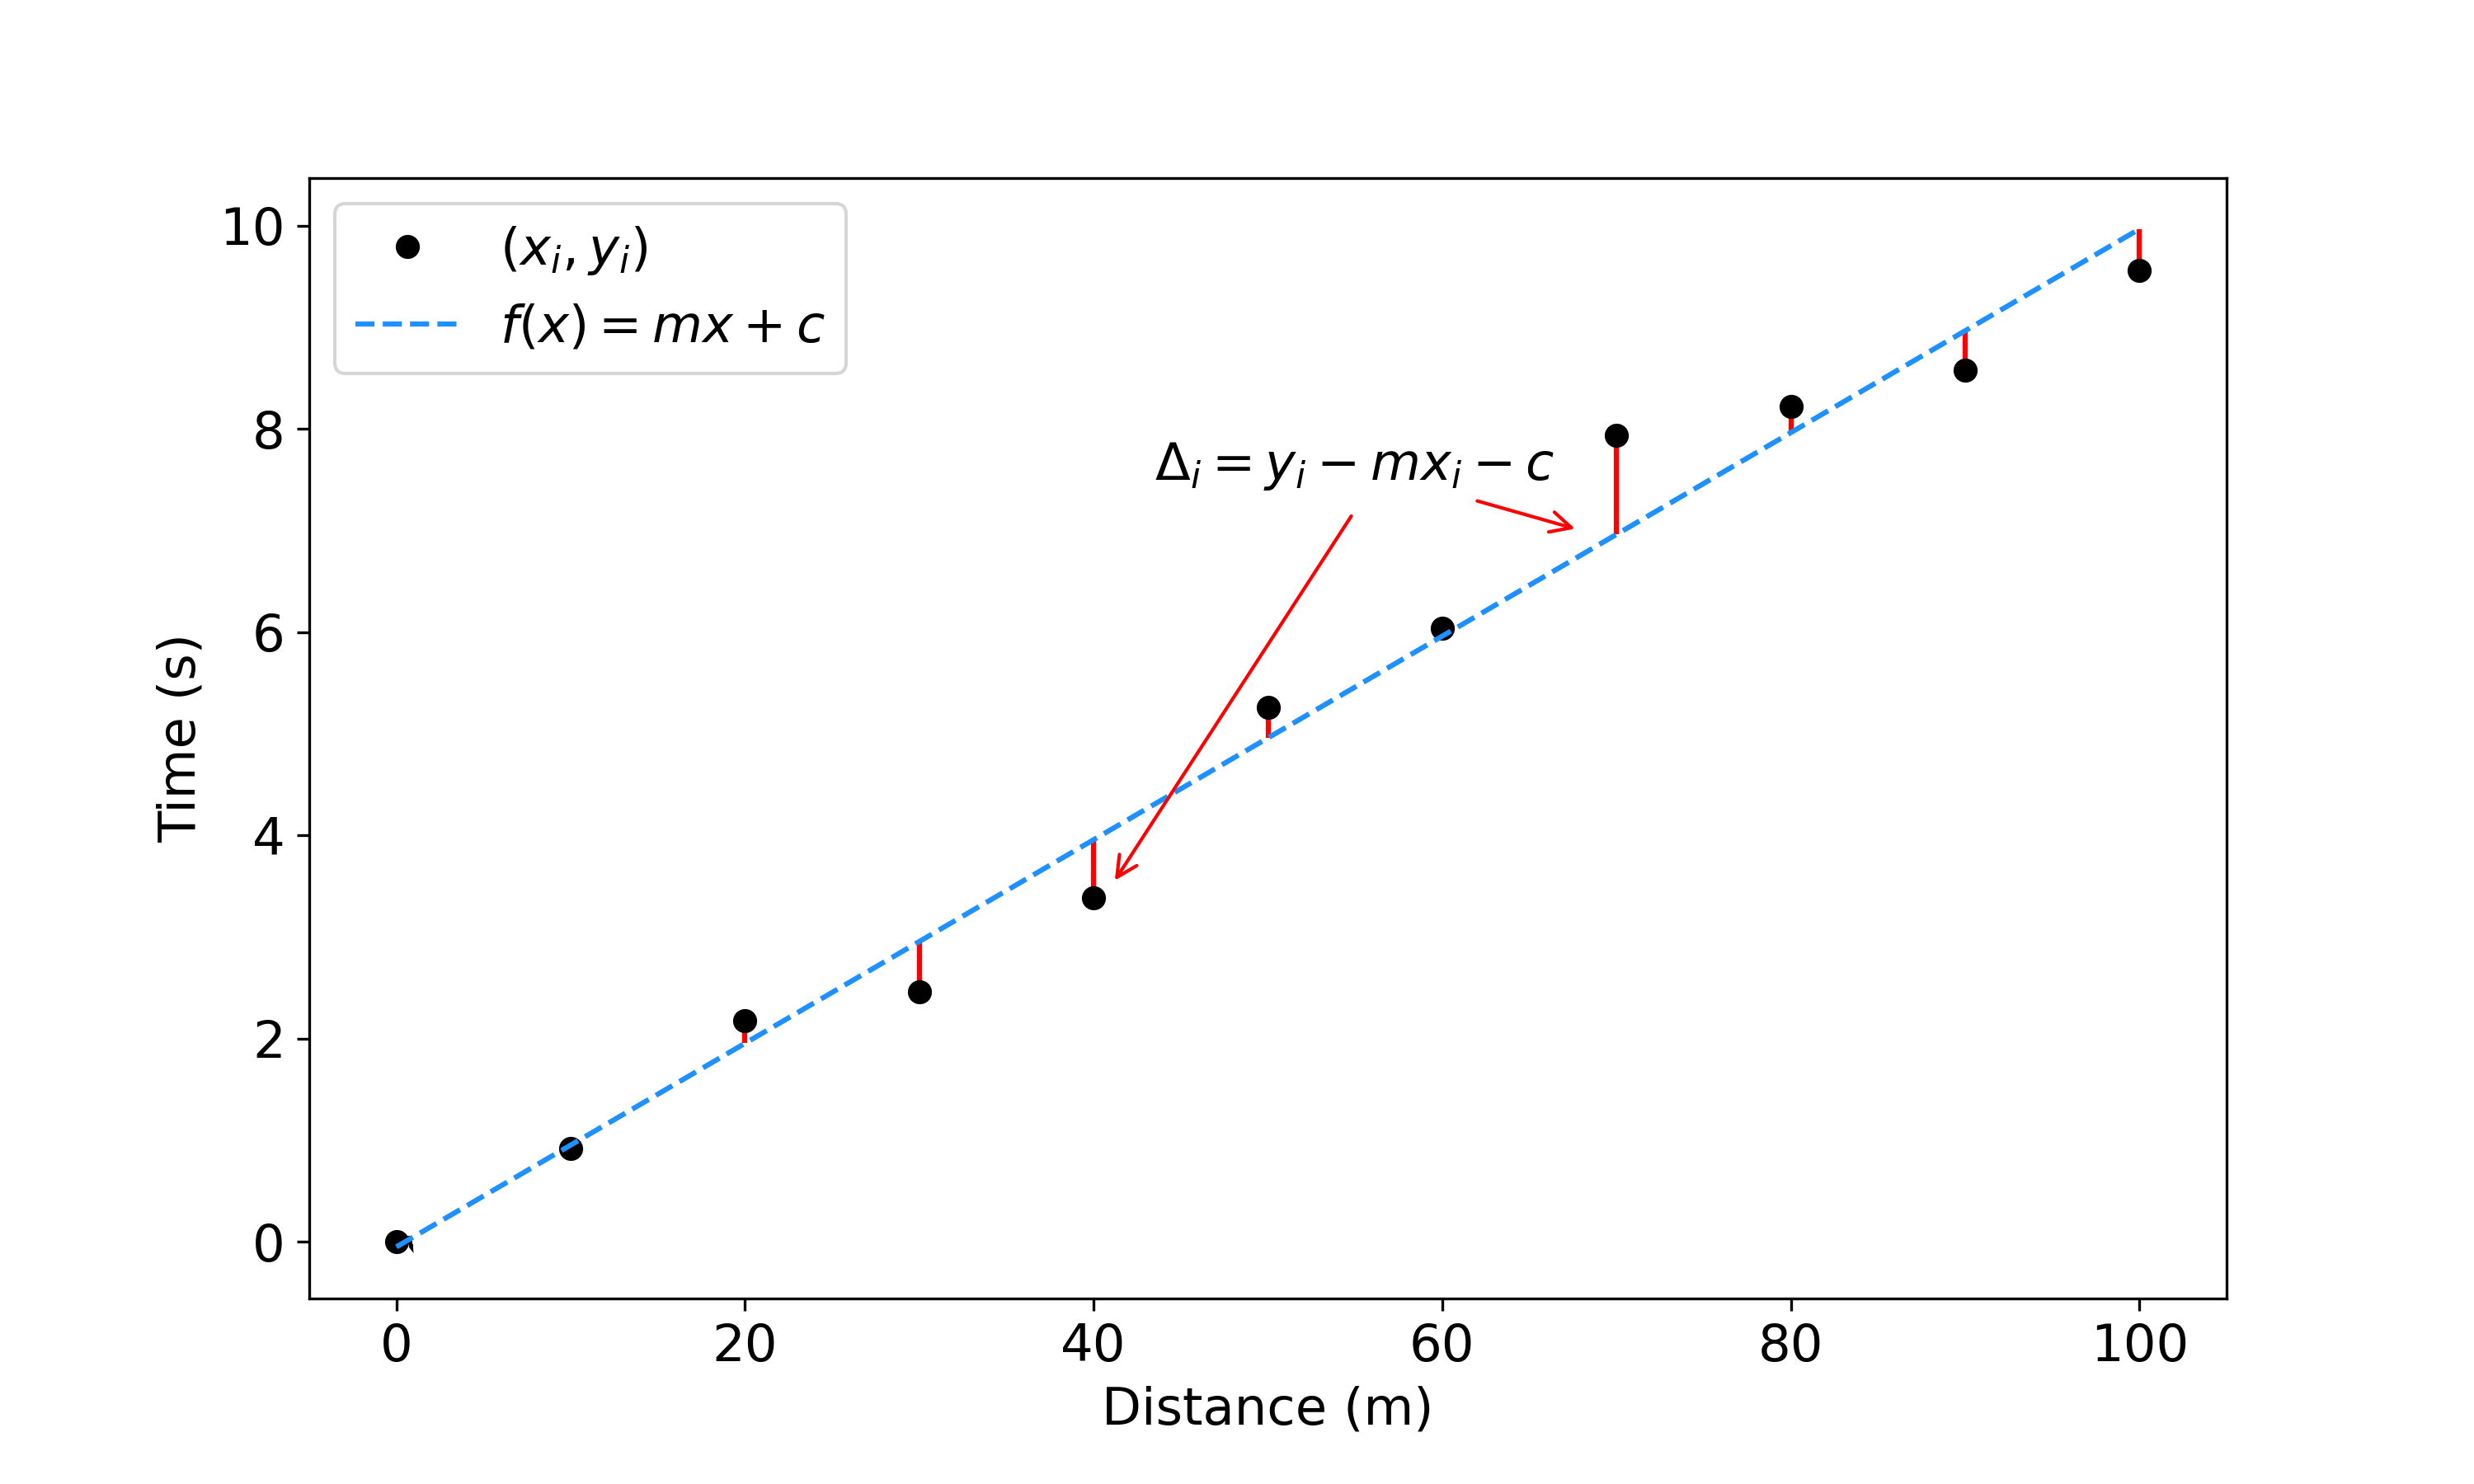

Our data has $N$ data points with the values $x_i$, $y_i$. The vertical distance between each point and the line (the red lines on the figure) is
$$ \Delta_i = y_i - m x - c $$

Least squares finds the values of $m$ and $c$ that **minimises the sum of the distances squared**, i.e. it minimises
$$ S = \sum_{i=1}^{N} (\Delta_i^2)$$
$$ S = \sum_{i=1}^{N} (y_i - m x_i - c)^2 $$

Why does least squares minimise $\sum \Delta_i^2$? Look at the figure above and think about why we want to minimise the squared values rather than just $\sum \Delta_i$.

To find the the values of $m$ and $c$ that minimise this sum we have to differentiate it with respect to $m$ and $c$ and solve the equations

$$\dfrac{\delta S}{\delta m} = 0$$
and 
$$\dfrac{\delta S}{\delta c} = 0 $$

For our example of a straight line this is relatively straight forward. 

### Finding $c$

For $\dfrac{\delta S}{\delta c}=0$ we find

$$ 
\dfrac{\delta S}{\delta c} = -2 \sum_{i=i}^{N}(y_i - m x_i - c) = 0
$$

(from here onwards $\sum = \sum_{i=1}^{N}$ to make it easier to read)

Rearranging gives

$$
\sum y_i - m \sum x_i - Nc = 0 \\$$
$$
c = \dfrac{\sum y_i - m \sum x_i}{N}
$$

### Finding $m$

The same thing is done for  $\dfrac{\delta S}{\delta m}=0$, substituting in the expression for $c$ found above. I haven't included the all the steps here, but you can work through the maths to convince yourself that it works. You should end up with 

$$
m = \dfrac{N \sum \left(x_i y_i\right) - \sum x_i \sum y_i}{N\sum\left(x_i^2\right) - \left(\sum x_i\right)^2}
$$

We can now calculate the best values of $m$ and $c$ by finding all the different summation values that we need. For a straight line fit we need $\sum x_i$, $\sum y_i$, $\sum x_i y_i$ and $\sum (x_i^2)$. We can find these using the `sum` function from `numpy`.

$\sum x_i$ and $\sum y_i$ are straightforward; they are just the sums of the $x$ (distance) and $y$ (time) values in our table. `numpy` can do that for us:

In [4]:
sum_x = np.sum(bolt_df.distance)
sum_y = np.sum(bolt_df.time)
print(sum_x, sum_y)

550 54.559074164


$\sum (x^2)$ is also easy to do:

In [5]:
sum_x_2 = np.sum((bolt_df.distance**2))
print(sum_x_2)

38500


## Exercise: Calculate $\sum x_i y_i$
Calculate the value of $\sum x_i y_i$. Assign it to a variable called `sum_x_y`

[solution]()

## Solution+: Calculate $\sum x_i y_i$


In [6]:
sum_x_y = np.sum((bolt_df.distance * bolt_df.time))
print(sum_x_y)

3829.69710839


:solution+

Now we can plug these into the expressions we have for $m$ and $c$.

## Exercise: Calculate $m$ and $c$
Use the summation values just calculated to find the best fit values for $m$ and $c$. Make a new plot of time against distance showing the data and the best fit line you have just found.

[solution]()

## Solution+: Calculate $m$ and $c$

From the equations for $m$ and $c$ above

In [7]:
N = len(bolt_df.time)
print(N)

11


In [8]:
N = len(bolt_df.time) ## we also need the number of points

m = ((N * sum_x_y) - (sum_x*sum_y))/((N * sum_x_2) - (sum_x)**2)
c = (sum_y - m*sum_x)/N

print(m,c)

0.10015849092636359 -0.04800871322726992


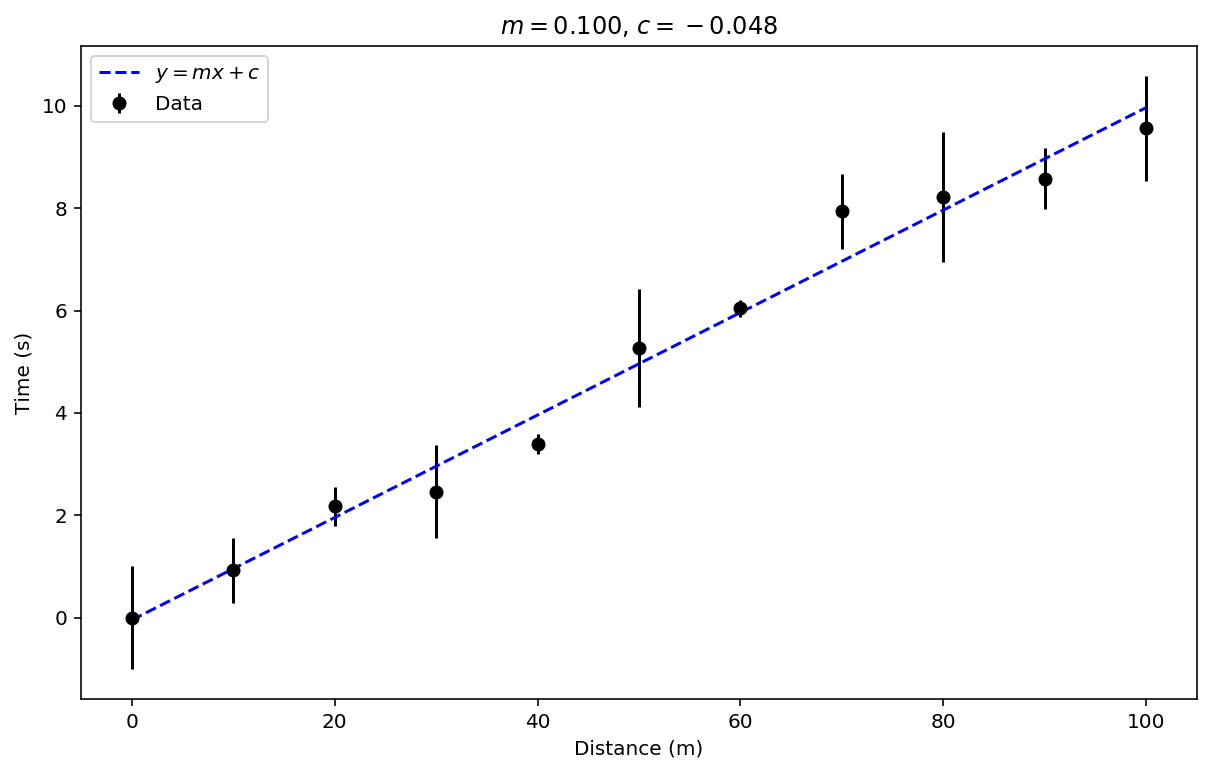

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(bolt_df.distance, bolt_df.time, yerr=bolt_df.err_time, color='k', marker='o', linestyle='None', label='Data')
ax.set_xlabel('Distance (m)')
ax.plot(bolt_df.distance, m*bolt_df.distance + c, color='blue', ls='--', label='$y = m x + c$')
ax.set_ylabel('Time (s)')
plt.legend()
title_string = "$m = {0:.3f}$, $c = {1:.3f}$".format(m, c)
ax.set_title(title_string)
plt.show()

:solution+

Hopefully you've ended up with a figure that looks something like this:

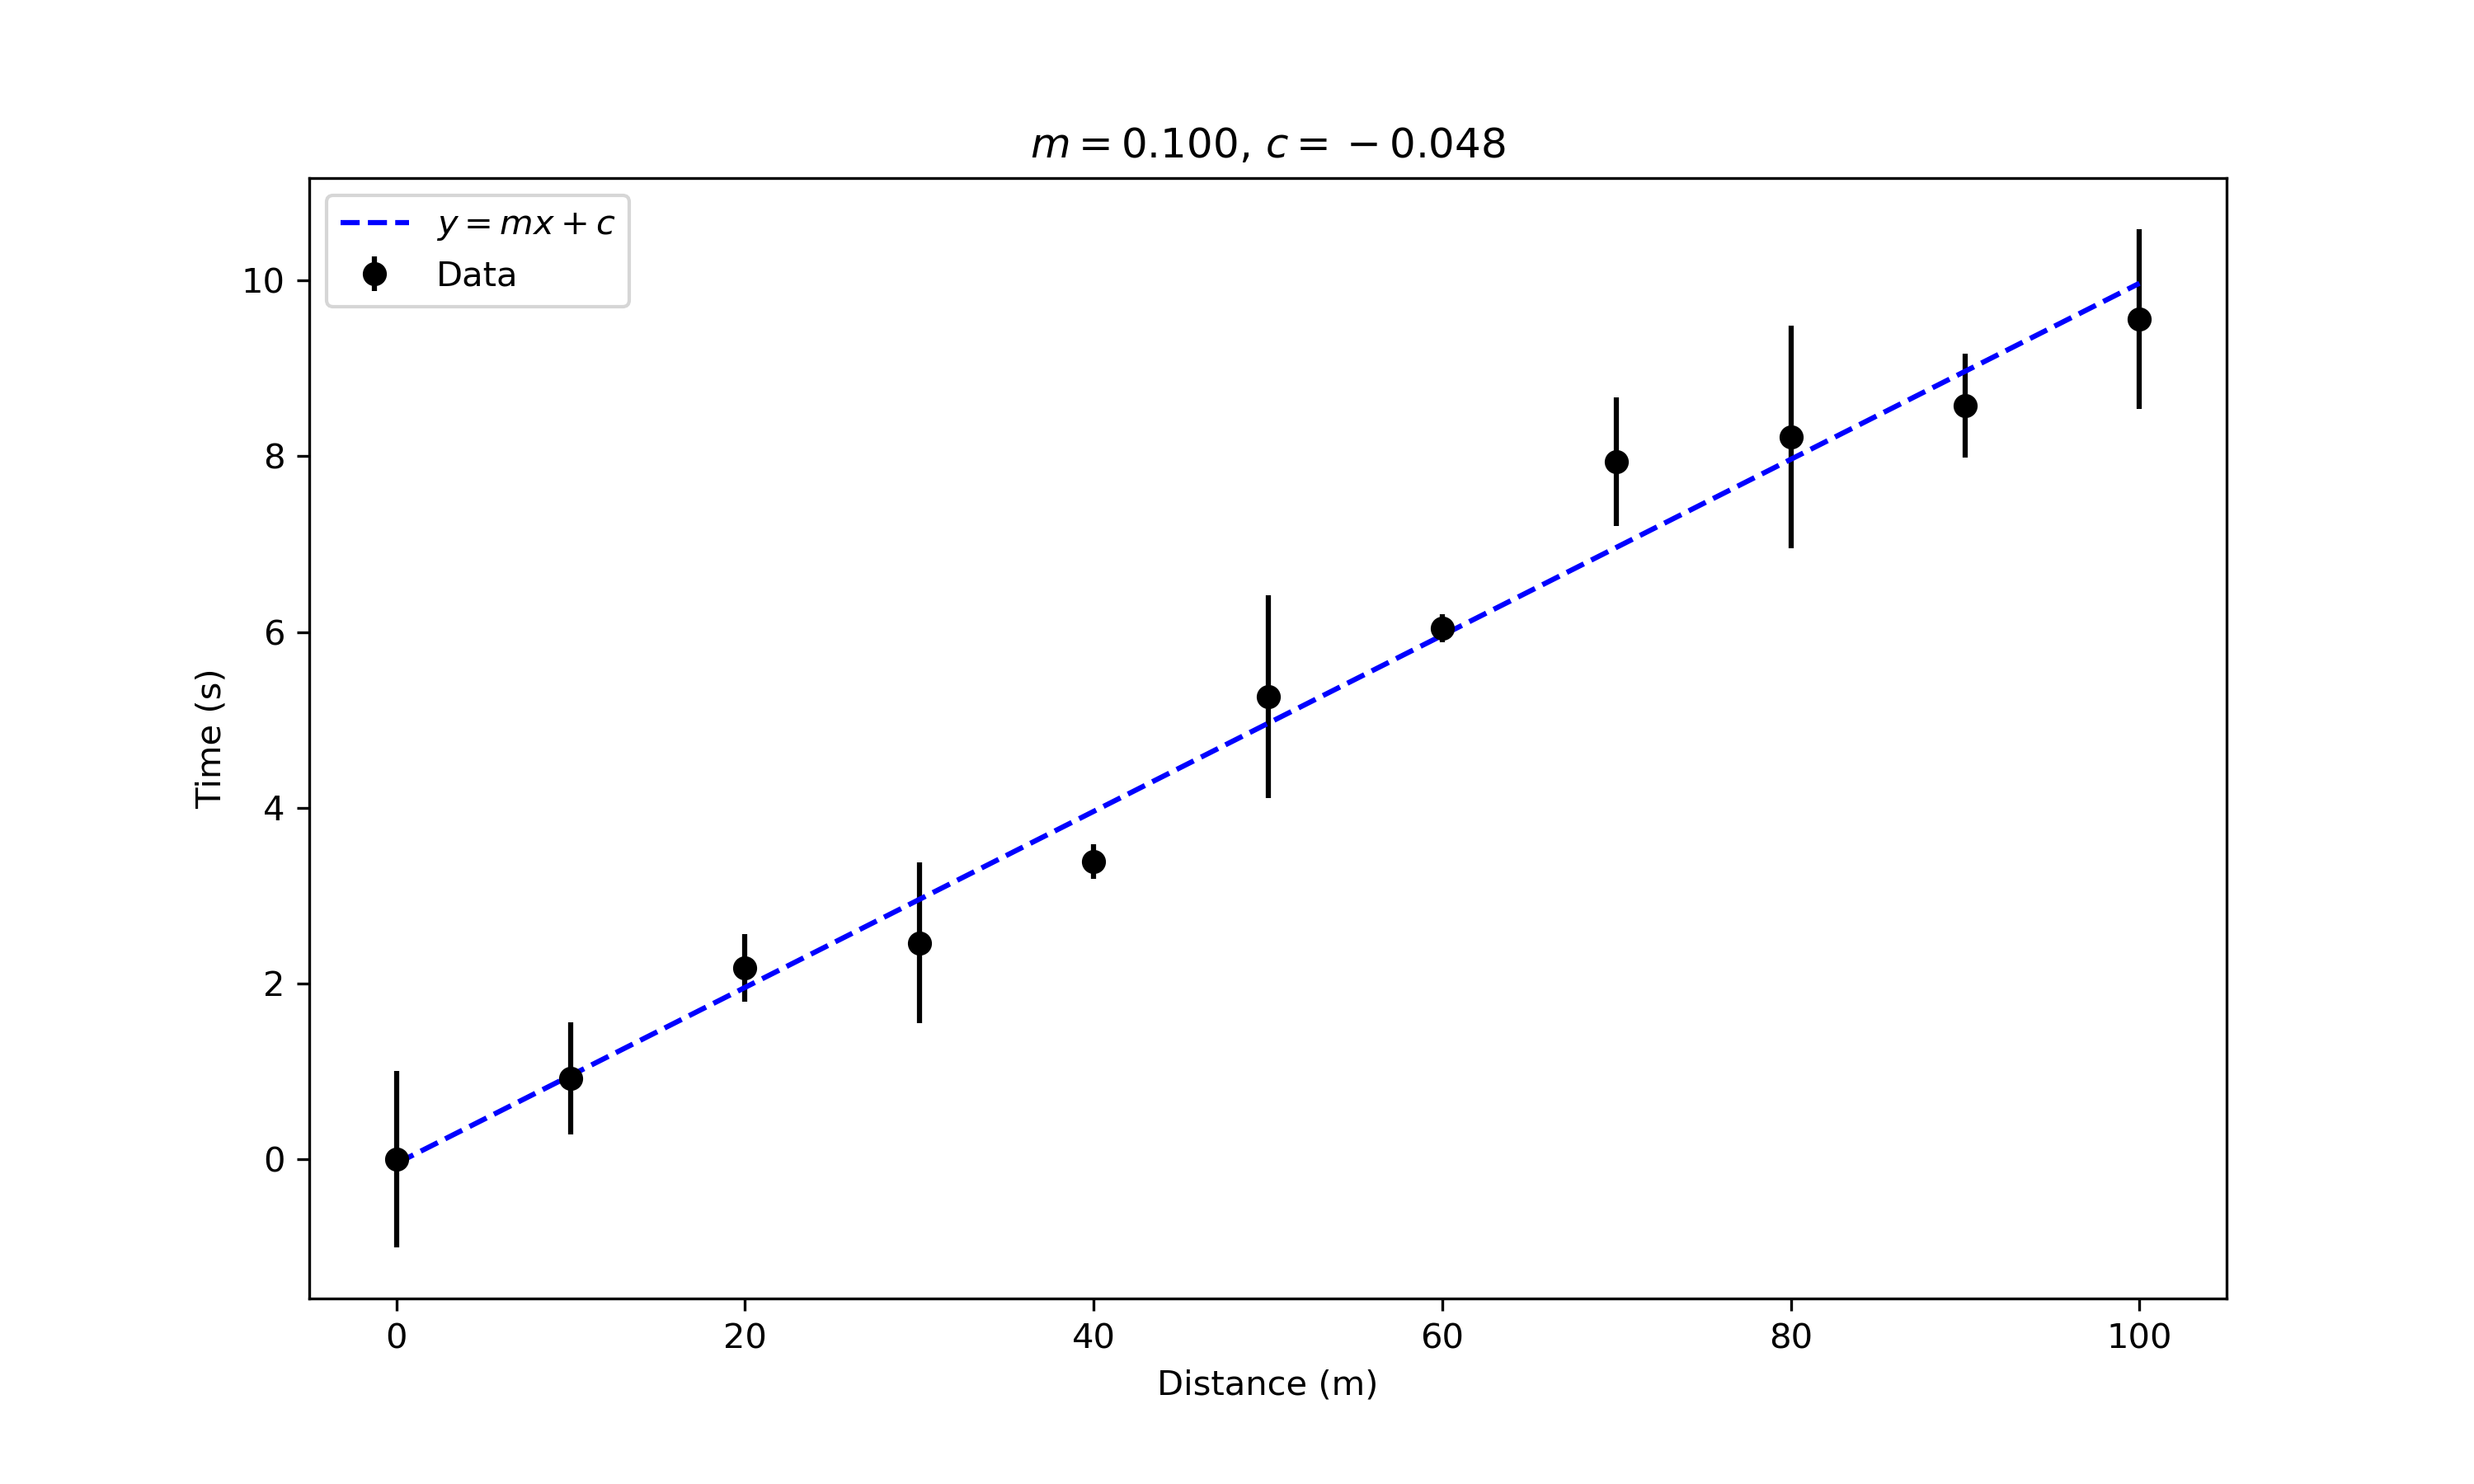

## Exercise: Check your result

Now you have your values for $m$ and $c$ from doing least-squares by hand. Check your results using `curve_fit`. Remember to define your function first.

## Solution+: Check your result

In [10]:
def line(x,m,c):
    return m*x + c

In [11]:
popt, pcov = curve_fit(line, bolt_df.distance, bolt_df.time)
m_fit = popt[0]
c_fit = popt[1]

In [12]:
print("My results: m = {0:.5f}, c = {1:.5f}".format(m, c))
print("Curve fit: m = {0:.5f}, c = {1:.5f}".format(m_fit, c_fit))



My results: m = 0.10016, c = -0.04801
Curve fit: m = 0.10016, c = -0.04801


Exactly the same! 

:solution+

## Key Points:
- `curve_fit` finds the parameters of the functions it's fitting using **least squares**.
- Least squares minimises the sum of the squares of the distances between the data and the function. 
- To find the values of the parameters you're fitting, differentiate your function with respect to each of the unknowns.
- The example above is for a simple straight line fit. The same method holds for whatever function you choose - just differentiate your function with respect to each unknown parameter.